# Importing Libraries

In [2]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#Loading Data

In [5]:
import zipfile

zip_file_path = '/content/Training.zip'  # add path to training zip file
extracted_dir_path = '/content/Training' # add destination path for unzipping training zip file


with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir_path)

In [6]:
data = tf.keras.utils.image_dataset_from_directory('/content/Training/Training') # add the path for training folder

Found 5712 files belonging to 4 classes.


In [7]:
data.class_names

['glioma', 'meningioma', 'notumor', 'pituitary']

#Pre-Processing & Splitting

In [8]:
#Scaling
data_scaled = data.map(lambda x,y:(x/255,y))

#Splitting
train_size = round(0.7*len(data))
val_size = round(0.3*len(data))

train_data = data_scaled.take(train_size)
val_data = data_scaled.skip(train_size).take(val_size)

# Model & Training

In [3]:
from keras.models import Sequential
from keras.layers import InputLayer,RandomContrast,RandomFlip,RandomRotation,RandomZoom,RandomTranslation,Conv2D,MaxPool2D,Flatten,Dropout,Dense
from keras.regularizers import l2

In [4]:
# Custom CNN Model

model = Sequential()

#Input Layer
model.add(InputLayer(shape=[256,256,3]))

#Data Augmentation
model.add(RandomContrast(0.3))

#Base Layer
model.add(Conv2D(64,3,activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.2))

model.add(Conv2D(64,3,activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.2))

model.add(Conv2D(64,3,activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(64,3,activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.2))

#Head Layer
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(512,activation='relu'))
model.add(Dense(4,activation='softmax'))

#Compile
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])

#Summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_contrast                 │ (None, 256, 256, 3)    │             0 │
│ (RandomContrast)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 254, 254, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 127, 127, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     6,423,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,537,668 (24.94 MB)

 Trainable params: 6,537,668 (24.94 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
hist = model.fit(train_data,validation_data=val_data,epochs=60)

Epoch 1/60
125/125 ━━━━━━━━━━━━━━━━━━━━ 38s 175ms/step - loss: 1.0615 - sparse_categorical_accuracy: 0.5746 - val_loss: 0.6266 - val_sparse_categorical_accuracy: 0.7266
Epoch 2/60
125/125 ━━━━━━━━━━━━━━━━━━━━ 22s 174ms/step - loss: 0.4947 - sparse_categorical_accuracy: 0.8148 - val_loss: 0.5388 - val_sparse_categorical_accuracy: 0.7658
Epoch 3/60
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 147ms/step - loss: 0.4217 - sparse_categorical_accuracy: 0.8337 - val_loss: 0.3396 - val_sparse_categorical_accuracy: 0.8838
Epoch 4/60
125/125 ━━━━━━━━━━━━━━━━━━━━ 19s 154ms/step - loss: 0.2773 - sparse_categorical_accuracy: 0.9004 - val_loss: 0.3775 - val_sparse_categorical_accuracy: 0.8557
Epoch 5/60
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 146ms/step - loss: 0.2268 - sparse_categorical_accuracy: 0.9210 - val_loss: 0.2787 - val_sparse_categorical_accuracy: 0.8995
Epoch 6/60
125/125 ━━━━━━━━━━━━━━━━━━━━ 19s 153ms/step - loss: 0.1661 - sparse_categorical_accuracy: 0.9326 - val_loss: 0.2687 - val_sparse_categorical_acc

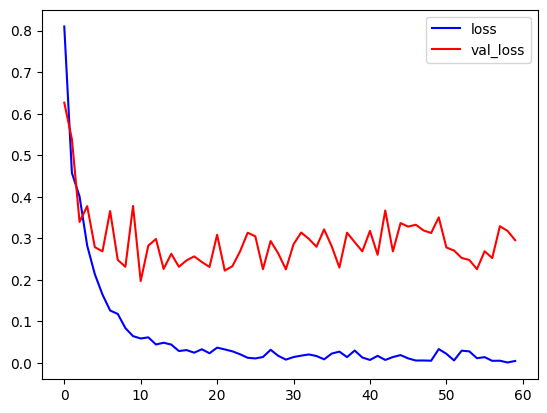

In [10]:
#Loss Plot
plt.plot(hist.history['loss'],color='blue',label='loss')
plt.plot(hist.history['val_loss'],color='red',label='val_loss')
plt.legend(loc='upper right')
plt.show()

# Saving Model

In [19]:
model.save("brain_tumor.keras")

#Evaluation

In [21]:
# Uncomment the below line if directly using the trained model
# model = tf.keras.models.load_model("brain_tumor.keras")

In [11]:
zip_file_path = '/content/Testing.zip' # add path to testing zip file
extracted_dir_path = '/content/Testing' # add destination path for unzipping testing zip file


with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir_path)

In [12]:
test = tf.keras.utils.image_dataset_from_directory('/content/Testing/Testing')  # add the path for testing folder

Found 1311 files belonging to 4 classes.


In [13]:
from keras.metrics import SparseCategoricalAccuracy

In [14]:
acc = SparseCategoricalAccuracy()

In [15]:
y_list=[]
ypred_list = []

In [16]:
for batch in test.as_numpy_iterator():
    X,y=batch

    y_pred = model.predict(X/255)
    acc.update_state(y,y_pred)
    for i in y:
      y_list.append(i)
    for i in y_pred:
      ypred_list.append(i)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━

In [ ]:
prediction=[]
for i in ypred_list:
    prediction.append(data.class_names[np.where(i==i.max())[0][0]])

In [ ]:
labels=[]
for i in y_list:
    labels.append(data.class_names[i])

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay

In [ ]:
cm = confusion_matrix(labels,prediction)

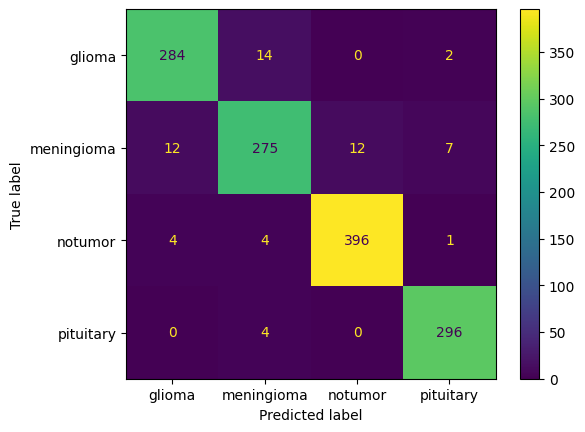

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.class_names)
disp.plot(cmap='viridis')

In [ ]:
print(classification_report(labels, prediction))

              precision    recall  f1-score   support

      glioma       0.95      0.95      0.95       300
  meningioma       0.93      0.90      0.91       306
     notumor       0.97      0.98      0.97       405
   pituitary       0.97      0.99      0.98       300

    accuracy                           0.95      1311
   macro avg       0.95      0.95      0.95      1311
weighted avg       0.95      0.95      0.95      1311



In [ ]:
print('Accuracy: {}'.format(acc.result()))

Accuracy: 0.9542334079742432
